In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import random
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from math import sqrt, pi, log
from sklearn.naive_bayes import GaussianNB

In [2]:
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) *1

Calculates mean and standard deviation of the data

In [3]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0, ddof=1)
print(X_mean, X_std)

[5.84333333 3.05733333] [0.82806613 0.43586628]


Standardizes the data

In [ ]:
sX = (X-X_mean)/X_std
sX

Adds bias feature to data

In [ ]:
bias = np.ones((sX.shape[0],1))
sX = np.hstack((bias, sX))
sX

Defines functions to be used in Logistic Regression

In [6]:
#THE LOGISTIC FUNCTION
def g(x, theta):
  return (1/(1+np.exp(-x@theta.T))).reshape(-1,1)

#THE LIKELIHOOD FUNCTION
def likelihood(y, x, theta):
  y=y.reshape(-1,1)
  return (g(x, theta)**y) * (1-g(x, theta))**(1-y)

#THE LOGLIKELIHOOD FUNCTION
def loglikelihood(y, x, theta):
  y=y.reshape(-1,1)
  return np.log(g(x, theta)+10e-250)*y + np.log(1-g(x, theta)+10e-250)*(1-y)

Initialize theta parameters with random values in range [-1, 1]

In [7]:
theta = np.random.uniform(low=-1, high=1, size=sX.shape[1])
theta

array([ 0.55797423, -0.578137  ,  0.77968848])

In [8]:
#COUNTER KEEPING TRACK OF ITERATIONS
i = 0
learn_rate = 0.01
#NUMBER OF TEST SAMPLES
n = sX.shape[0]
#INITIAL LOG LIKELIHOOD OF RANDOM VALUE THETAS FOR STOP CONDITION 
cost0=loglikelihood(y, sX, theta).sum(axis=0)
while i<10000:
  #UPDATING THETA PARAMETERS USING GRADIENT DESCENT
  theta = theta + (learn_rate/n)*sX.T@(y-g(sX,theta).flatten())
  #COMPUTE LOG LIKELIHOOD WITH UPDATED THETA
  cost1=loglikelihood(y, sX, theta).sum(axis=0)
  #STOP CONDITION IN ABSOLUTE VALUE CHANGE OF LOSS FUNCTION
  if abs(cost1-cost0<2**-23):
    break
  i+=1
  #UPDATING LOG LIKELIHOOD OF PAST ITERATION
  cost0=cost1
#MAXIMUM VALUE OF LIKELIHOOD ACROSS ALL SAMPLES 
print(cost1, i)

[-6.98719143] 10000


In [9]:
#RESULTED THETAS
theta

array([ 2.13932627,  3.76647847, -2.55256341])

Verification using LogisticRegression from sklearn

In [10]:
#SET FIT_INTERCEPT TO FALSE TO ACCOUNT FOR OUR BIAS FEATURE
lgr = LogisticRegression(penalty='none', solver='lbfgs', max_iter=10000, fit_intercept=False)
reg = lgr.fit(sX, y)
reg_theta = reg.coef_.flatten()
#MAXIMUM VALUE OF LIKELIHOOD ACROSS ALL SAMPLES 
loglikelihood(y, sX, reg_theta).sum(axis=0)

array([-0.00015166])

In [11]:
reg_theta

array([ 49.26318048,  69.73722961, -30.90205269])

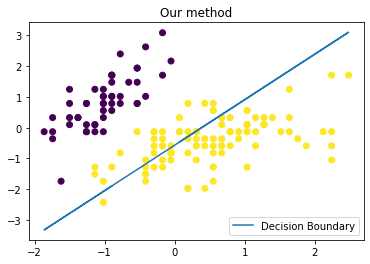

In [12]:
#PLOTTING X2 AS A FUNCTION OF X1
plt.scatter(sX[:,1], sX[:,2], c=y)
#PLOTTING THE DECISION BOUNDARY FROM FORMULA X@THETA = 0
plt.plot(sX[:,1], -theta[1]/theta[2]*sX[:,1]-theta[0]/theta[1], label='Decision Boundary')
plt.legend()
plt.title('Our method')
plt.show()

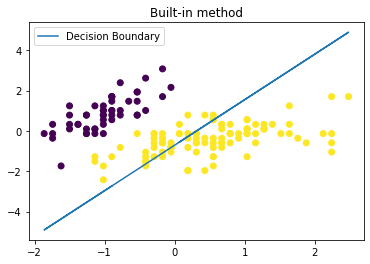

In [13]:
plt.scatter(sX[:,1], sX[:,2], c=y)
plt.plot(sX[:,1], -reg_theta[1]/reg_theta[2]*sX[:,1]-reg_theta[0]/reg_theta[1], label='Decision Boundary')
plt.legend()
plt.title('Built-in method')
plt.show()

Plots are similar enough to verify our results as correct